In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data

In [3]:
df = pd.read_csv('../data/TACR_Starfos_isvav_project.csv')

In [4]:
df.columns

Index(['Kód projektu', 'Název česky', 'Název anglicky', 'Anotace česky',
       'Anotace anglicky', 'Hlavní CEP obor', 'Vedlejší CEP obor',
       'Další vedlejší CEP obor', 'Hlavní FORD obor', 'Vedlejší FORD obor',
       'Další vedlejší FORD obor', 'Kategorie VaV', 'Hlavní účastníci',
       'Další účastníci', 'Výčet právních forem účastníků',
       'Výčet krajů účastníků', 'Výčet zemí účastníků',
       'Podrobné informace o účastnících', 'Hlavní řešitelé', 'Další řešitelé',
       'Klíčová slova', 'Výčet druhů dosažených výsledků', 'Poskytovatel',
       'Program', 'Uznané náklady', 'Podpora ze SR',
       'Ostatní veřejné zdroje fin.', 'Neveřejné zdroje fin.',
       'Začátek řešení', 'Konec řešení', 'URL v Starfose', 'Relevance'],
      dtype='object')

In [23]:
pd.set_option('display.max_colwidth', None)
adf = df[['Název česky', 'Název anglicky', 'Anotace česky',
    'Anotace anglicky', 'Hlavní CEP obor', 'Podrobné informace o účastnících', 
    'Hlavní řešitelé', 'Klíčová slova', 'Výčet druhů dosažených výsledků', 'Poskytovatel', 
    'Uznané náklady', 'Podpora ze SR', 'Ostatní veřejné zdroje fin.', 'Neveřejné zdroje fin.']]
adf[~adf.isna().any(axis=1)].iloc[100:101].T

824
Název česky                                                                                                                                              Studium tenkých polymerních vrstev pomocí AFM a rozvoj metod pro diagnostiku plazmatu
Název anglicky                                                                                                                                                    Polymer thin film study by AFM and improvement of plasma diagnostics methods
Anotace česky                                                                                                   studium korelace mezi parametry plazmatu a experimentálně zkoumanou morfologií a strukturou plazmaticky modifikovaných povrchů
Anotace anglicky                                                                                                   study of correlation between plasma parametres and experimantaly tested morfolofy and structure of plasma modified surfaces
Hlavní CEP obor                                                                                                                                                                                        BL - Fyzika plasmatu a výboje v plynech
Podrobné informace o účastnících  Univerzita Jana Evangelisty Purkyně v Ústí nad Labem / Přírodovědecká fakulta (ico: 44555601; forma: VVS - Veřejná nebo státní vysoká škola; adresa: Pasteurova 3632/15, 400 96 Ústí nad Labem-město, Česko)
Hlavní řešitelé                                                                                                                                                                                    RNDr. Jaroslav Pavlík CSc. (vedidk=8822646)
Klíčová slova                                                                                    Polymer thin film; AFM; Atomic force microscopy; structural analysis; morfology; modified surfaces; improvement of plasma diagnostics methods
Výčet druhů dosažených výsledků                                                                                                                                                                                                           3; 4
Poskytovatel                                                                                                                                                                               MŠMT - Ministerstvo školství, mládeže a tělovýchovy
Uznané náklady                                                                                                                                                                                                                             304
Podpora ze SR                                                                                                                                                                                                                              152
Ostatní veřejné zdroje fin.                                                                                                                                                                                                                  0
Neveřejné zdroje fin.                                                                                                                                                                                                                      152

In [24]:
pd.set_option('display.max_colwidth', None)
dfa = df[['Hlavní účastníci', 'Další účastníci', 'Výčet právních forem účastníků', 'Výčet krajů účastníků', 'Výčet zemí účastníků', 'Podrobné informace o účastnících']].iloc[[-1]]
display(dfa)

Hlavní účastníci Další účastníci  \
53398  SG Geotechnika a.s. (IČO: 41192168)             NaN   

                            Výčet právních forem účastníků  \
53398  POO - Právnická osoba zapsaná v obchodním rejstříku   

      Výčet krajů účastníků  Výčet zemí účastníků  \
53398          Hl. m. Praha  CZ - Česká republika   

                                                                                                                                 Podrobné informace o účastnících  
53398  SG Geotechnika a.s. (ico: 41192168; forma: POO - Právnická osoba zapsaná v obchodním rejstříku; adresa: Geologická 988/4, 152 00 Praha 5-Hlubočepy, Česko)

In [4]:
# Info about data
for column in df:
    print(f'Pocet NaN v {column}: {df[column].isna().sum()}')

Pocet NaN v Kód projektu: 0
Pocet NaN v Název česky: 0
Pocet NaN v Název anglicky: 773
Pocet NaN v Anotace česky: 0
Pocet NaN v Anotace anglicky: 8302
Pocet NaN v Hlavní CEP obor: 5944
Pocet NaN v Vedlejší CEP obor: 28080
Pocet NaN v Další vedlejší CEP obor: 40960
Pocet NaN v Hlavní FORD obor: 47487
Pocet NaN v Vedlejší FORD obor: 50308
Pocet NaN v Další vedlejší FORD obor: 51217
Pocet NaN v Kategorie VaV: 16996
Pocet NaN v Hlavní účastníci: 16426
Pocet NaN v Další účastníci: 25623
Pocet NaN v Výčet právních forem účastníků: 992
Pocet NaN v Výčet krajů účastníků: 1224
Pocet NaN v Výčet zemí účastníků: 992
Pocet NaN v Podrobné informace o účastnících: 0
Pocet NaN v Hlavní řešitelé: 16901
Pocet NaN v Další řešitelé: 47264
Pocet NaN v Klíčová slova: 13685
Pocet NaN v Výčet druhů dosažených výsledků: 12770
Pocet NaN v Poskytovatel: 0
Pocet NaN v Program: 0
Pocet NaN v Uznané náklady: 0
Pocet NaN v Podpora ze SR: 0
Pocet NaN v Ostatní veřejné zdroje fin.: 0
Pocet NaN v Neveřejné zdroje fin.

In [26]:
print(len(filter_by_count(subset_df, 'Poskytovatel', 4000)['Poskytovatel'].unique()))
print(len(filter_by_count(subset_df, 'Poskytovatel', 4000)['Poskytovatel']) / len(subset_df))

NameError: name 'filter_by_count' is not defined

In [5]:
df[['Výčet druhů dosažených výsledků']].dropna().head()

Výčet druhů dosažených výsledků
0                           3; 48
1                           2; 48
2                              48
3                           1; 48
4                              48

In [6]:
NaN_fields = df[['Název anglicky', 'Anotace anglicky', 'Hlavní CEP obor', 'Klíčová slova']].isna().any(axis=1)
cleaned_df = df[~NaN_fields]
cleaned_df['DobaReseni'] = cleaned_df['Konec řešení'] - cleaned_df['Začátek řešení'] 
len(cleaned_df)

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


30988

In [7]:
subset_df = cleaned_df[[
    'Kód projektu',
    'Název česky',
    'Název anglicky',
    'Anotace česky',
    'Anotace anglicky',
    'Hlavní CEP obor',
    'Hlavní FORD obor',
    'Klíčová slova',
    'Podrobné informace o účastnících',
    'Poskytovatel',
    'Program',
    'Uznané náklady',
    'Podpora ze SR',
    'Ostatní veřejné zdroje fin.',
    'Neveřejné zdroje fin.',
    'Začátek řešení',
    'Konec řešení',
    'DobaReseni',
    'Relevance']]
subset_df.dtypes

Kód projektu                         object
Název česky                          object
Název anglicky                       object
Anotace česky                        object
Anotace anglicky                     object
Hlavní CEP obor                      object
Hlavní FORD obor                     object
Klíčová slova                        object
Podrobné informace o účastnících     object
Poskytovatel                         object
Program                              object
Uznané náklady                        int64
Podpora ze SR                         int64
Ostatní veřejné zdroje fin.           int64
Neveřejné zdroje fin.                 int64
Začátek řešení                        int64
Konec řešení                          int64
DobaReseni                            int64
Relevance                           float64
dtype: object

In [8]:
len(subset_df['Poskytovatel'].unique())

29

In [9]:
# Poskytovatele:
subset_df['Poskytovatel'].unique()

array(['MZ - Ministerstvo zdravotnictví',
       'MZe - Ministerstvo zemědělství',
       'MŽP - Ministerstvo životního prostředí',
       'AV ČR - Akademie věd České republiky',
       'MD - Ministerstvo dopravy',
       'MPO - Ministerstvo průmyslu a obchodu',
       'MPSV - Ministerstvo práce a sociálních věcí',
       'MŠMT - Ministerstvo školství, mládeže a tělovýchovy',
       'ČBÚ - Český báňský úřad', 'BIS - Bezpečnostní informační služba',
       'MI - Ministerstvo informatiky', 'MK - Ministerstvo kultury',
       'GA ČR - Grantová agentura České republiky',
       'SÚJB - Státní úřad pro jadernou bezpečnost',
       'ÚřVl ČR - Úřad vlády České republiky', 'MO - Ministerstvo obrany',
       'MZV - Ministerstvo zahraničních věcí',
       'MS - Ministerstvo spravedlnosti', 'MV - Ministerstvo vnitra',
       'NBÚ - Národní bezpečnostní úřad',
       'TA ČR - Technologická agentura ČR',
       'MH - Ministerstvo hospodářství', 'KUL - Ústecký kraj',
       'KHK - Královéhradecký kr

In [10]:
# CEP (Centralni Evidence Projektu) obory:
subset_df['Hlavní CEP obor'].unique()

array(['FB - Endokrinologie, diabetologie, metabolismus, výživa',
       'EB - Genetika a molekulární biologie',
       'FR - Farmakologie a lékárnická chemie', 'FO - Dermatovenerologie',
       'FH - Neurologie, neurochirurgie, neurovědy', 'FM - Hygiena',
       'FN - Epidemiologie, infekční nemoci a klinická imunologie',
       'FA - Kardiovaskulární nemoci včetně kardiochirurgie',
       'FL - Psychiatrie, sexuologie',
       'FE - Ostatní obory vnitřního lékařství',
       'FK - Gynekologie a porodnictví', 'FI - Traumatologie a ortopedie',
       'FP - Ostatní lékařské obory',
       'FF - ORL, oftalmologie, stomatologie',
       'FJ - Chirurgie včetně transplantologie', 'FC - Pneumologie',
       'FD - Onkologie a hematologie',
       'GF - Choroby, škůdci, plevely a ochrana rostlin',
       'GH - Výživa hospodářských zvířat',
       'GJ - Choroby a škůdci zvířat, veterinární medicina',
       'EE - Mikrobiologie, virologie', 'EC - Imunologie',
       'EI - Biotechnologie a bionik

In [11]:
# Programy
subset_df['Program'].unique()

array(['1A - Zdraví obyvatel',
       'NS - VaV pro Ministerstvo zdravotnictví II',
       '1B - Kvalitní a bezpečná výživa',
       '1C - Krajina a sídla budoucnosti',
       '1D - Životní prostředí a ochrana přírodních zdrojů',
       '1E - Informační společnost', '1F - Bezpečná a ekonomická doprava',
       '1G - Využití přírodních zdrojů', '1H - POKROK',
       '1I - Racionální využití energie a obnovitelné přírodní zdroje',
       '1J - Moderní společnost a její proměny',
       '1K - Podpora začínajících pracovníků výzkumu',
       '1M - Výzkumná centra', '1N - Informační infrastruktura výzkumu',
       '1P - Regionální a mezinárodní spolupráce ve výzkumu',
       '1Q - Podpora projektů cíleného výzkumu',
       '1R - Krajina a sídla budoucnosti', '2A - Trvalá  prosperita',
       '2B - Zdravý a kvalitní život',
       '2C - Informační technologie pro znalostní společnost',
       '2D - Sociálně-ekonomický rozvoj české společnosti',
       '2E - Lidské zdroje',
       '2G - Podpo

In [12]:
obory = subset_df[['Hlavní CEP obor', 'Hlavní FORD obor']]
obory[obory['Hlavní FORD obor'].isna()]

Hlavní CEP obor Hlavní FORD obor
0      FB - Endokrinologie, diabetologie, metabolismu...              NaN
1      FB - Endokrinologie, diabetologie, metabolismu...              NaN
2                   EB - Genetika a molekulární biologie              NaN
3                  FR - Farmakologie a lékárnická chemie              NaN
4                   EB - Genetika a molekulární biologie              NaN
...                                                  ...              ...
53372  JE - Nejaderná energetika, spotřeba a užití en...              NaN
53373  DH - Báňský průmysl včetně těžby a zpracování ...              NaN
53374  JE - Nejaderná energetika, spotřeba a užití en...              NaN
53375  JE - Nejaderná energetika, spotřeba a užití en...              NaN
53384                 DI - Znečištění a kontrola vzduchu              NaN

[30988 rows x 2 columns]

In [13]:
def trim_and_split(x):
    x = x.split('\n')
    for i in range(len(x)):
        x[i] = x[i].split('(')[0].strip()
    return tuple(x)
subset_df['Ucastnici'] = subset_df['Podrobné informace o účastnících'].apply(trim_and_split)
print(f'Pocet ucastniku: {len(subset_df["Ucastnici"].unique())}')

Pocet ucastniku: 10261


/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


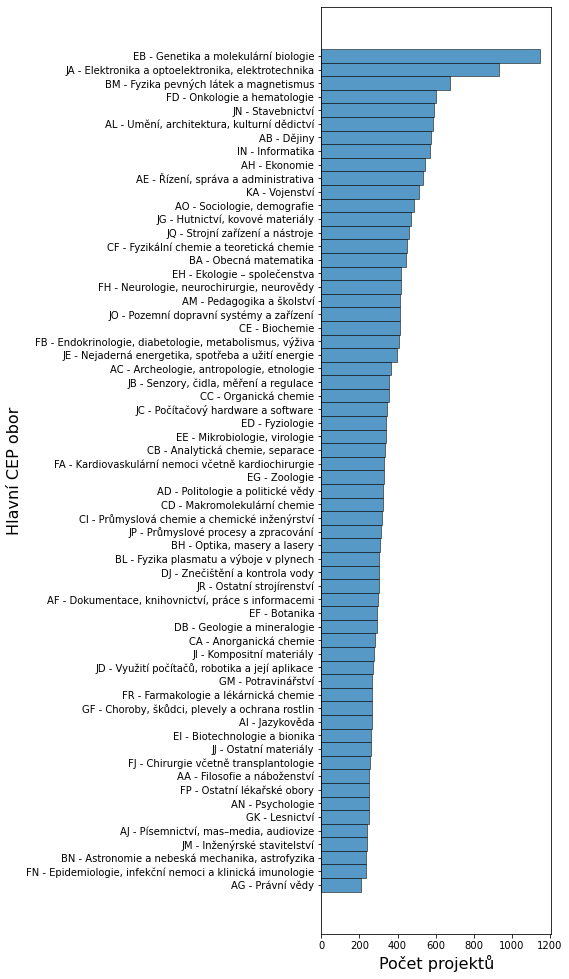

In [56]:
def sort_by_group_counts(df, key, descending=True):
    new_df = df.iloc[df.groupby(key)[key].transform('size').argsort(kind='mergesort')]
    if descending:
        return new_df[::-1]
    else:
        return new_df

filtered = filter_by_count(subset_df, 'Hlavní CEP obor', 200)
plt.figure(figsize=(8, 13.7))
sorted_domains = sort_by_group_counts(filtered, 'Hlavní CEP obor')
sns.histplot(sorted_domains, y='Hlavní CEP obor', linewidth=.5)
plt.ylabel('Hlavní CEP obor', fontsize=16)
plt.xlabel('Počet projektů', fontsize=16)
plt.tight_layout()
plt.savefig('obory.pdf')

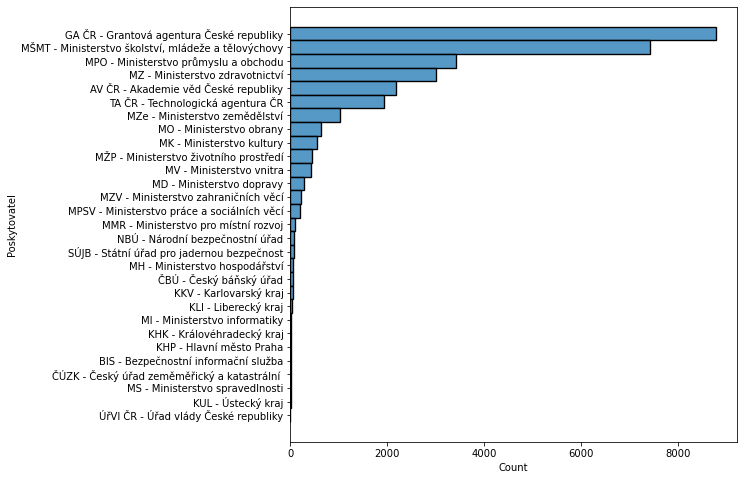

In [15]:
plt.figure(figsize=(8, 8))
sorted_domains = sort_by_group_counts(subset_df, 'Poskytovatel')
sns.histplot(sorted_domains, y='Poskytovatel')

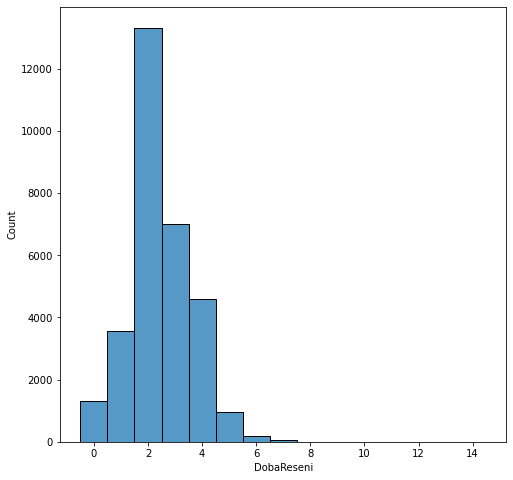

In [16]:
# Delka projektu -> normalni rozdeleni s tezkym ocasem huh
plt.figure(figsize=(8, 8))
sorted_domains = sort_by_group_counts(subset_df, 'DobaReseni')
sns.histplot(sorted_domains, x='DobaReseni', discrete=True)

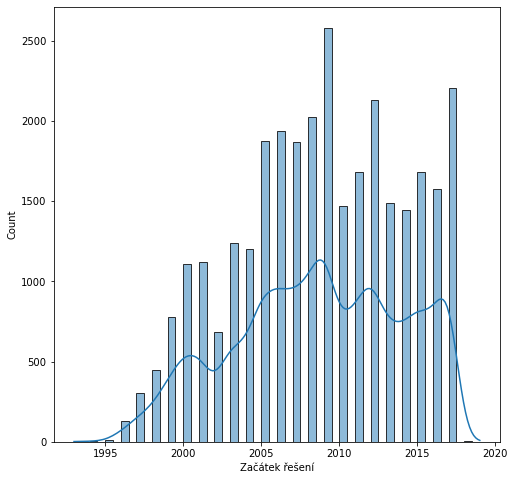

In [17]:
# Zacatky projektu
plt.figure(figsize=(8, 8))
sorted_domains = sort_by_group_counts(subset_df, 'Začátek řešení')
sns.histplot(sorted_domains, x='Začátek řešení', kde=True)

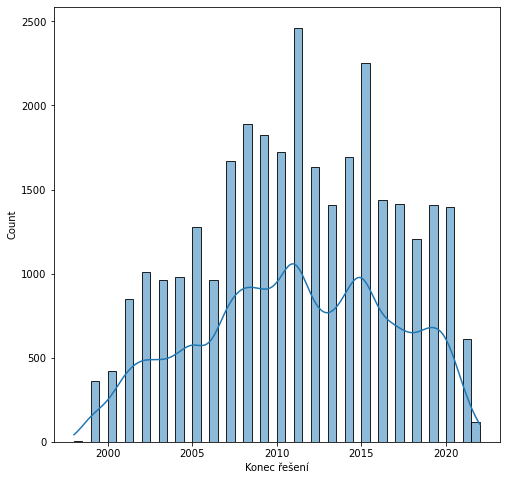

In [18]:
plt.figure(figsize=(8, 8))
sorted_domains = sort_by_group_counts(subset_df, 'Konec řešení')
sns.histplot(sorted_domains, x='Konec řešení', kde=True)

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


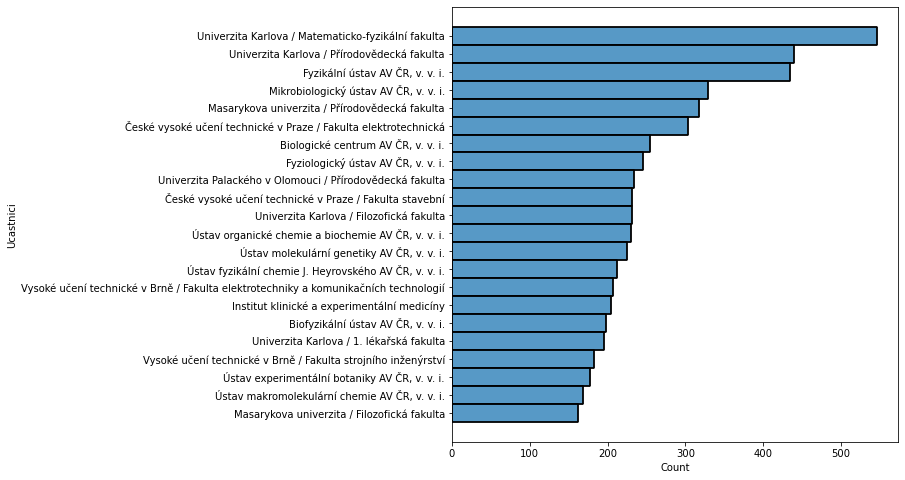

In [19]:
def filter_by_count(df, key, threshold, up=True):
    if up:
        new_df = df[df.groupby(key)[key].transform('size') >= threshold]
    else:
        new_df = df[df.groupby(key)[key].transform('size') <= threshold]
    return new_df

top_participants = filter_by_count(subset_df, 'Ucastnici', 150)
top_participants['Ucastnici'] = top_participants['Ucastnici'].apply(lambda x: ';'.join(x))

plt.figure(figsize=(8, 8))
sorted_domains = sort_by_group_counts(top_participants, 'Ucastnici')
sns.histplot(sorted_domains, y='Ucastnici')

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


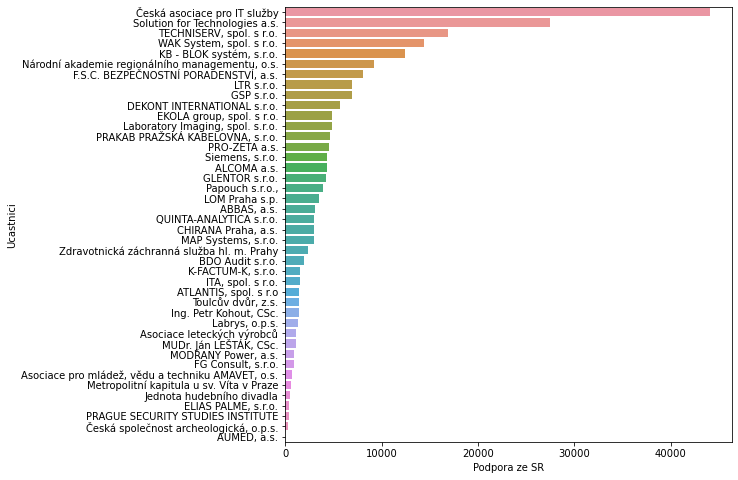

In [20]:
top_participants = filter_by_count(subset_df, 'Ucastnici', 1, up=False)
sus_projects = top_participants[(top_participants['Ucastnici'].map(len) == 1) & (top_participants['Podrobné informace o účastnících'].str.contains('Praha 1'))]

sus_projects['Ucastnici'] = sus_projects['Ucastnici'].apply(lambda x: ';'.join(x))
plt.figure(figsize=(8, 8))
sorted_domains = sus_projects.sort_values('Podpora ze SR')[::-1]
sns.barplot(y='Ucastnici', x='Podpora ze SR', data=sorted_domains)

In [21]:
sus_projects

Kód projektu                                        Název česky  \
91           1C/4/40/04                  Výzkum odcizování člověka přírodě   
1016        2A-1TP1/046  Výzkum a vývoj technologického zařízení pro zv...   
1893            7D13003  Výpočetní jednotka s vysokým výkonem kombinova...   
1918            7D17004  Rozšíření DRBD pro nasazení velkých cloud depl...   
3300      DA99P01OLK001  Thesaurus absconditus. Ediční řada památek sta...   
3350      DD07P03OUK003    Marketingový potenciál českého operního publika   
5023      EE2.4.31.0013  Praktická Akademie IT znalostí - rozvoj odborn...   
5972   EG16_083/0009885  Rozšíření funkcionalit zabezpečovacího systému...   
6001   EG16_083/0010301  Transfer faktor - vývoj a výzkum nové  lékové ...   
6012   EG16_083/0010350  Výzkum a vývoj zařízení pro detekci, kontrolu,...   
7483          FF-P2/133  *Vývoj leteckého pístového motoru pro malá let...   
8037         FI-IM5/088  Vývoj technologie, výroba a ověření prototypu ...   
8080         FI-IM5/152  *Výzkum a vývoj nových receptur výroby vibroli...   
8436         FR-TI1/429  *Vývoj nových materiálů a konstrukčního řešení...   
8439         FR-TI1/435  Optimální průchodový plán počítačový model pro...   
8573         FR-TI2/093  *Vývoj a validace nových bioanalytických metod...   
8807         FR-TI3/520  Věda a výzkum projevů hornické činnosti ve vzt...   
21952     GA404/05/2206  Katalog starých tisků v Knihovně Metropolitní ...   
25228    GAP405/10/2242  Genderová analýza v interpretaci sociokulturní...   
25245    GAP405/11/2511  Nadregionální kontakty Čech v době stěhování n...   
35155            LA 159  Reprezentace mladých fyziků z České republiky ...   
35181            LA 185  Zajištění přístupu k vědeckovýzkumným informac...   
40346            NK7267  Transpupilární termoterapie exsudativní, věkem...   
40660            NR7970  Náhlá zástava oběhu v přednemocniční péči. Ana...   
43320          OC C7.40  Interakce stavby a základové půdy v městském s...   
43876              OE95  Energeticky úsporný systémpro dynamické testov...   
44300           OK08004  Zapojení velkých podniků a jejich národních pa...   
46193          PZ-Z2/05  Nový skiagrafický komplet a nový kobaltový oza...   
47801       RM 01/01/07  Podíl nových členských zemí na formování a usk...   
48663       SG/320/1/01  Analýza veřejných podpor s negativním vlivem n...   
48723        SL/7/48/05  Materiálové toky a nakládání s odpady - Naklád...   
48748       SM/250/4/03  Zefektivnění strategického plánování sjednocen...   
48836     SP/1B6/193/07          Stanovení akustického klimatu na území ČR   
50548           TC6-027  Vývoj universální řady parabolických anten pro...   
52669     VD20062007A02  Optimalizace vztahů udržitelného rozvoje a och...   
52687     VD20072009B18  MOST - systém prověřování virtuálních nábojnic...   
52695     VD20102010B21  Počítačový systém pro portrétní imaginaci osob...   
52736     VF20132015030  Automatické rozpoznávaní a identifikace objekt...   
52778     VG20102014019  Návrh a implementace technik a procesů pro pod...   
52855     VG20122015096  Kooperativní robotický průzkum nebezpečných ob...   
52906     VH20172019016  Analýza ohrožení vysokorychlostní železniční d...   
53339        WD-50-07-1  Procesy oízení regionálního rozvoje na úrovni ...   

                                          Název anglicky  \
91             Human disaffection to the nature research   
1016   Research and development of a process equipmen...   
1893   Combination of a High Performance Computing (H...   
1918    Extending DRBD for Large Scale Cloud Deployments   
3300   Thesaurus Absconditus Edition. Old Czech Liter...   
3350            Czech Opera Audience Marketing Potential   
5023   IT Academy - professional skills of university...   
5972   Extending the functionality of the security sy...   
6001   Transfer faktor - research and developement of...   
6012   Research and development of equipment for dete...

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


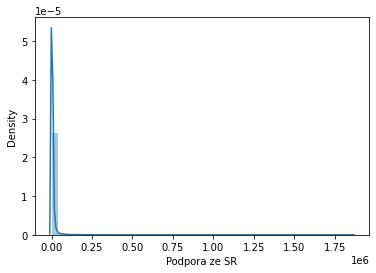

In [22]:
# Rozdeleni dat
sns.distplot(subset_df['Podpora ze SR'])

In [23]:
def filter_by_value(df, key, threshold, up=True):
    if up:
        new_df = df[df[key] > threshold]
    else:
        new_df = df[df[key] < threshold]
    return new_df

most_expensive_projects = filter_by_value(subset_df, 'Podpora ze SR', 1000000)
most_expensive_projects

Kód projektu                                        Název česky  \
4440   ED1.1.00/02.0061                  ELI: EXTREME LIGHT INFRASTRUCTURE   
5110   EF15_008/0000162        ELI - EXTREME LIGHT INFRASTRUCTURE - fáze 2   
5424   EF16_040/0003542  Národní centrum pro elektronické informační zd...   
36495         LM2010005                        Velká infrastruktura CESNET   

                                          Název anglicky  \
4440                   ELI: EXTREME LIGHT INFRASTRUCTURE   
5110        ELI - EXTREME LIGHT INFRASTRUCTURE - phase 2   
5424   National Centre for Electronic Information Res...   
36495                        Large Infrastructure CESNET   

                                           Anotace česky  \
4440   Projekt ELI je součástí evropské cestovní mapy...   
5110   Hlavními cíli projektu ELI je vybudování nejmo...   
5424   Globálním cílem  projektu je zvýšení výkonnost...   
36495  Cílem projektu "Velká infrastruktura CESNET" j...   

                                        Anotace anglicky  \
4440   ELI project is a part of the European roadmap ...   
5110   The main objectives of the ELI project is to b...   
5424   The global objective of the project is to incr...   
36495  The main goal of the project "Large infrastruc...   

                                         Hlavní CEP obor Hlavní FORD obor  \
4440             BL - Fyzika plasmatu a výboje v plynech              NaN   
5110                        BH - Optika, masery a lasery              NaN   
5424   AF - Dokumentace, knihovnictví, práce s inform...              NaN   
36495                                   IN - Informatika              NaN   

                                           Klíčová slova  \
4440   New technique of generation of ultrashort lase...   
5110                                          laser beam   
5424   Information resources; scientific libraries; c...   
36495                                   e-infrastructure   

                        Podrobné informace o účastnících  \
4440   Fyzikální ústav AV ČR, v. v. i. (ico: 68378271...   
5110   Fyzikální ústav AV ČR, v. v. i. (ico: 68378271...   
5424   Národní technická knihovna (ico: 61387142; for...   
36495  CESNET, zájmové sdružení právnických osob (ico...   

                                            Poskytovatel  \
4440   MŠMT - Ministerstvo školství, mládeže a tělový...   
5110   MŠMT - Ministerstvo školství, mládeže a tělový...   
5424   MŠMT - Ministerstvo školství, mládeže a tělový...   
36495  MŠMT - Ministerstvo školství, mládeže a tělový...   

                                             Program  Uznané náklady  \
4440                                   ED - OP VaVpI         6800576   
5110                                      EF - OPVVV         1859488   
5424                                      EF - OPVVV         1104596   
36495  LM - Projekty velkých infrastruktur pro VaVaI         2143612   

       Podpora ze SR  Ostatní veřejné zdroje fin.  Neveřejné zdroje fin.  \
4440         1020086                      5780490                      0   
5110         1859488                            0                  92974   
5424         1104596                            0                      0   
36495        1398800                        12812                 732000   

       Začátek řešení  Konec řešení  DobaReseni  Relevance  \
4440             2011          2015           4        1.0   
5110             2016          2018           2        1.0   
5424             2017          2022           5        1.0   
36495            2011          2015           4        1.0   

                                               Ucastnici  
4440                  (Fyzikální ústav AV ČR, v. v. i.,)  
5110                  (Fyzikální ústav AV ČR, v. v. i.,)  
5424                       (Národní technická knihovna,)  
36495  (CESNET, zájmové sdružení právnických osob, Ma...

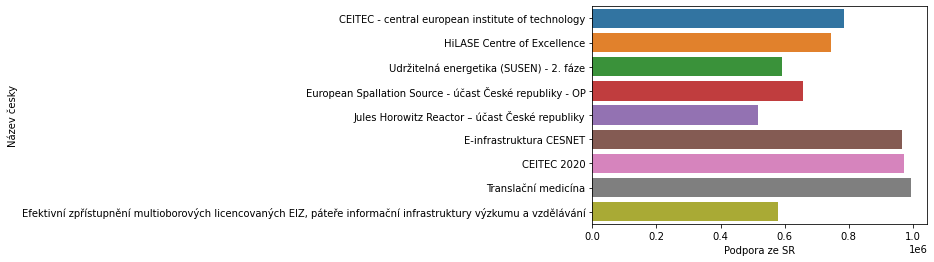

In [24]:
expensive_projects = filter_by_value(subset_df, 'Podpora ze SR', 500000)
expensive_projects = filter_by_value(expensive_projects, 'Podpora ze SR', 1000000, up=False)
sns.barplot(x='Podpora ze SR', y='Název česky', data=expensive_projects)

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

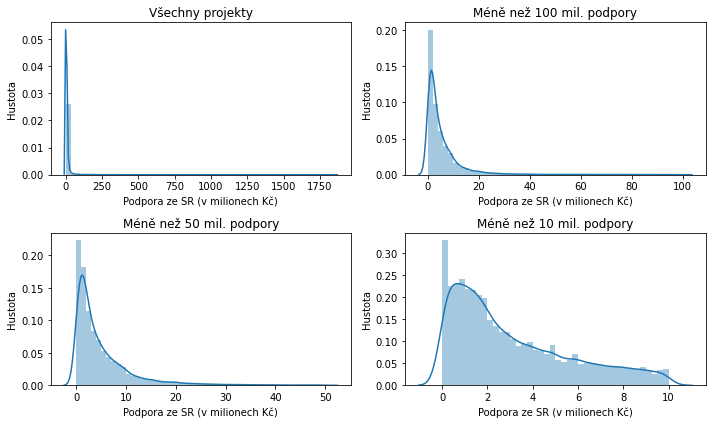

In [25]:
# Rozdeleni dat -> bez outlieru
# Vypada lognormalne -> muzu zkusit zlogaritmovat
fig, axes = plt.subplots(figsize=(10, 6), ncols=2, nrows=2)
axes[0][0].set_title('Všechny projekty')
df_no_outliers = subset_df
sns.distplot(df_no_outliers['Podpora ze SR'] / 1000, ax=axes[0][0])
axes[0][0].set_xlabel('Podpora ze SR (v milionech Kč)')
axes[0][0].set_ylabel('Hustota')

axes[0][1].set_title('Méně než 100 mil. podpory')
df_no_outliers = subset_df[subset_df['Podpora ze SR'] < 100000]
sns.distplot(df_no_outliers['Podpora ze SR'] / 1000, ax=axes[0][1])
axes[0][1].set_xlabel('Podpora ze SR (v milionech Kč)')
axes[0][1].set_ylabel('Hustota')

axes[1][0].set_title('Méně než 50 mil. podpory')
df_no_outliers = subset_df[subset_df['Podpora ze SR'] < 50000]
sns.distplot(df_no_outliers['Podpora ze SR'] / 1000, ax=axes[1][0])
axes[1][0].set_xlabel('Podpora ze SR (v milionech Kč)')
axes[1][0].set_ylabel('Hustota')

axes[1][1].set_title('Méně než 10 mil. podpory')
df_no_outliers = subset_df[subset_df['Podpora ze SR'] < 10000]
sns.distplot(df_no_outliers['Podpora ze SR'] / 1000, ax=axes[1][1])
axes[1][1].set_xlabel('Podpora ze SR (v milionech Kč)')
axes[1][1].set_ylabel('Hustota')

plt.tight_layout()
# plt.savefig('podpora_rozdeleni.png')
plt.show()

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

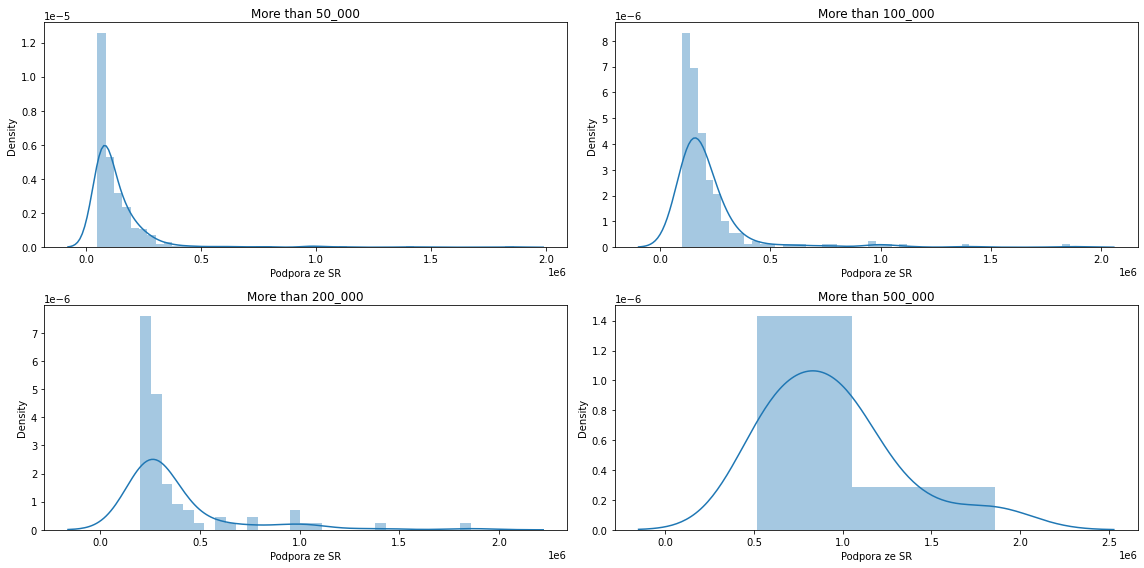

In [26]:
# Distribution of the outliers (more than 50_000)
fig, axes = plt.subplots(figsize=(16, 8), ncols=2, nrows=2)

axes[0][0].set_title('More than 50_000')
outliers = subset_df[subset_df['Podpora ze SR'] > 50_000]
sns.distplot(outliers['Podpora ze SR'], ax=axes[0][0])

axes[0][1].set_title('More than 100_000')
outliers = subset_df[subset_df['Podpora ze SR'] > 100_000]
sns.distplot(outliers['Podpora ze SR'], ax=axes[0][1])

axes[1][0].set_title('More than 200_000')
outliers = subset_df[subset_df['Podpora ze SR'] > 200_000]
sns.distplot(outliers['Podpora ze SR'], ax=axes[1][0])

axes[1][1].set_title('More than 500_000')
outliers = subset_df[subset_df['Podpora ze SR'] > 500_000]
sns.distplot(outliers['Podpora ze SR'], ax=axes[1][1])

plt.tight_layout()

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

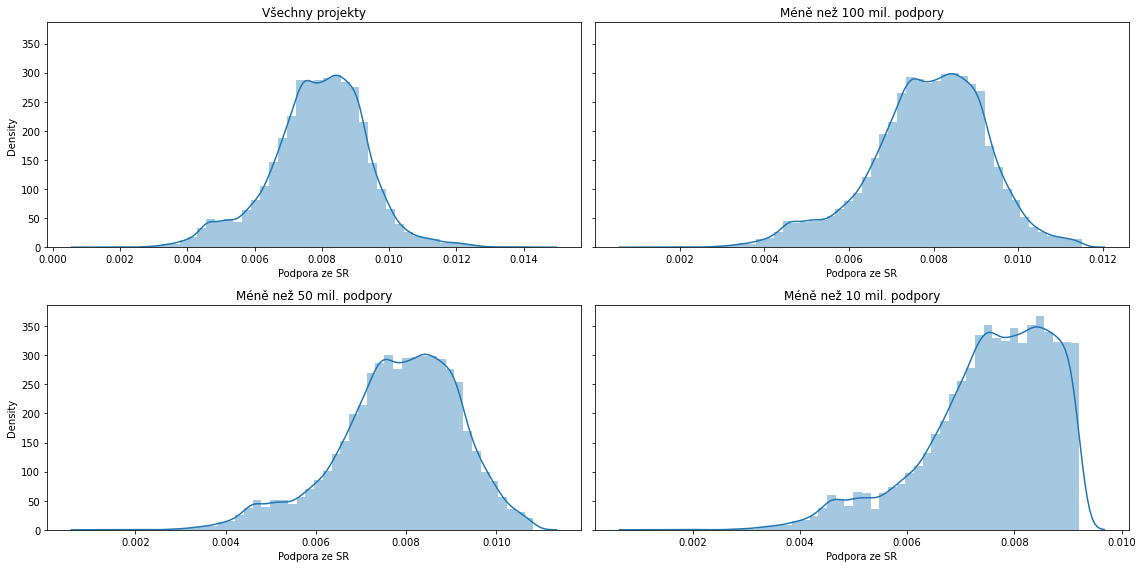

In [27]:
fig, axes = plt.subplots(figsize=(16, 8), ncols=2, nrows=2, sharey=True)

axes[0][0].set_title('Všechny projekty')
df_no_outliers = subset_df[['Podpora ze SR']]
df_no_outliers['Podpora ze SR'] = df_no_outliers['Podpora ze SR'].apply(lambda x: np.log(x) if x > 0 else np.nan)
sns.distplot(df_no_outliers['Podpora ze SR'] / 1000, ax=axes[0][0])

axes[0][1].set_title('Méně než 100 mil. podpory')
df_no_outliers = subset_df[subset_df['Podpora ze SR'] < 100000]
df_no_outliers['Podpora ze SR'] = df_no_outliers['Podpora ze SR'].apply(lambda x: np.log(x) if x > 0 else np.nan)
sns.distplot(df_no_outliers['Podpora ze SR'] / 1000, ax=axes[0][1])

axes[1][0].set_title('Méně než 50 mil. podpory')
df_no_outliers = subset_df[subset_df['Podpora ze SR'] < 50000]
df_no_outliers['Podpora ze SR'] = df_no_outliers['Podpora ze SR'].apply(lambda x: np.log(x) if x > 0 else np.nan)
sns.distplot(df_no_outliers['Podpora ze SR'] / 1000, ax=axes[1][0])

axes[1][1].set_title('Méně než 10 mil. podpory')
df_no_outliers = subset_df[subset_df['Podpora ze SR'] < 10000]
df_no_outliers['Podpora ze SR'] = df_no_outliers['Podpora ze SR'].apply(lambda x: np.log(x) if x > 0 else np.nan)
sns.distplot(df_no_outliers['Podpora ze SR'] / 1000, ax=axes[1][1])

plt.tight_layout()

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


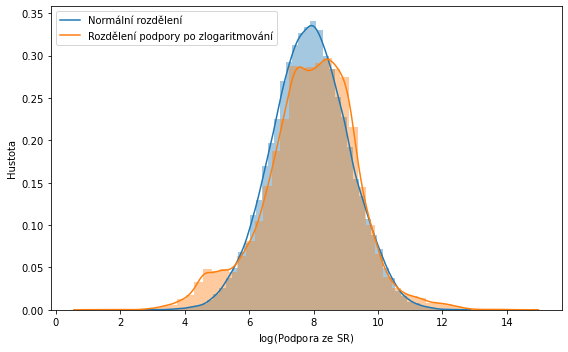

In [28]:
plt.figure(figsize=(8, 5))
from scipy.stats import t, norm
log_normal = subset_df['Podpora ze SR'].apply(lambda x: np.log(x) if x > 0 else np.nan)
normal = norm.rvs(log_normal.mean(), np.sqrt(log_normal.std()), size=len(log_normal))
sns.distplot(normal)
sns.distplot(log_normal)
plt.legend(labels=['Normální rozdělení', 'Rozdělení podpory po zlogaritmování'], loc=2)
plt.ylabel('Hustota')
plt.xlabel(r'$\log$(Podpora ze SR)')
plt.tight_layout()
#plt.savefig('normal_lognormal.pdf')

In [29]:
norm.pdf(x)

NameError: name 'x' is not defined

In [30]:
from scipy.stats import anderson, kstest, t, ttest_ind, norm

In [68]:
log_normal = log_normal[~np.isnan(log_normal)]
normal_baseline = t.rvs(100, size=100)
print("Test normality using t-test:")
print(ttest_ind(log_normal, norm.rvs(size=log_normal.size)))
print("Baseline normal:")
print(ttest_ind(norm.rvs(size=log_normal.size), norm.rvs(size=log_normal.size)))
print()
print("Perform an Anderson normality test:")
print(anderson(log_normal, dist='norm'))
print("Baseline normal:")
print(anderson(norm.rvs(size=log_normal.size), dist='norm'))
print()
print("Perform Kolmogorov-Smirnov goodness of fit test to test for normality:")
print(kstest(log_normal, 'norm'))
print("Baseline normal:")
print(kstest(norm.rvs(size=log_normal.size), 'norm'))

Test normality using t-test:
Ttest_indResult(statistic=792.6271061109022, pvalue=0.0)
Baseline normal:
Ttest_indResult(statistic=0.1908308686479703, pvalue=0.8486587323281181)

Perform an Anderson normality test:
AndersonResult(statistic=112.83181682734721, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Baseline normal:
AndersonResult(statistic=0.37840687247444293, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Perform Kolmogorov-Smirnov goodness of fit test to test for normality:
KstestResult(statistic=0.9982850656278862, pvalue=0.0)
Baseline normal:
KstestResult(statistic=0.0033687915466307228, pvalue=0.8744940800877313)


In [20]:
import plotly.express as px
import plotly.graph_objects as go

def scatter_plot(src_df, x=None, y=None, hover_columns=None, size=None, size_scale=20, 
                 color=None, title=None, x_title=None, y_title=None):
    df = src_df.copy()
    hover_text = []
    bubble_size = []

    for index, row in df.iterrows():
        text = '<br>'.join([f'{column}: {row[column]}' for column in hover_columns])
        hover_text.append(text)
        bubble_size.append(row[size] * size_scale)

    df['text'] = hover_text
    df['size'] = bubble_size
    sizeref = 2.*max(df['size'])/(size_scale**2)

    categories = df[color].unique().tolist()
    categorical_data = {category:df.query(f'{color} == "{category}"') for category in categories}
    
    fig = go.Figure()

    for c_name, c in categorical_data.items():
        fig.add_trace(go.Scatter(
            x=c[x], y=c[y], name=c_name, text=c['text'], marker_size=c['size']
        ))

    fig.update_traces(mode='markers', marker=dict(sizemode='area', sizeref=sizeref, line_width=2))
    fig.update_layout(
        title=title,
        xaxis=dict(
            title=x_title,
            gridcolor='white',
            gridwidth=2,
        ),
        yaxis=dict(
            title=y_title,
            gridcolor='white',
            gridwidth=2,
        ),
        paper_bgcolor='rgb(243, 243, 243)',
        plot_bgcolor='rgb(243, 243, 243)',
    )
    fig.show()

In [32]:
project_results = pd.read_csv('../data/vysledky_vavai.csv')
projects = pd.read_csv('../data/TACR_Starfos_isvav_project.csv')

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (3,4,7,8,9,10,17,18,22,23,24,25,26,32,33,35,37,38,40,41,42,43,45,46,47,48,49,50,51,52,53,54,57,58,59,61,62,63,64,65,66,67,68,69,71,72,73,74,75,76,77,78,81,82,84,89,90,91,92,93,94,95,96,97,99,100,101,102,103,104,105,106,108,109,110) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
results = pd.read_csv('../data/VaVaI_Projekty_s_vysledky.csv')
results.head()

Unnamed: 0 Kód projektu                                        Název česky  \
0           0       1A8235  Účast neuroaktivních steroidů na mužské reprod...   
1           1       1A8236  Zkvalitnění péče o pacienty s cystickou fibróz...   
2           2       1A8237  Molekulárně cytogenetická analýza buněk mozkov...   
3           3       1A8238  Modelování potenciálně antimykobakteriálně akt...   
4           4       1A8239  Rozvoj aplikací DNA čipů pro potřeby diagnosti...   

                                      Název anglicky  \
0          Neuroactive steroids in male reproduction   
1  Improvement of care for patients with cystic f...   
2  MOLECULAR CYTOGENETIC ANALYSIS OF BRAIN TUMOUR...   
3  Modelling of potentially antimycobacterial act...   
4  Applications of DNA microarrays in molecular d...   

                                       Anotace česky  \
0  Předmětem projektu je studium účasti neuroakti...   
1  Cílem je ověření efektivity (proveditelnosti a...   
2  Molekulárně cytogenetická studie signifikantní...   
3  Syntéza nových potenciálně antimykobakteriálně...   
4  Aplikace DNA čipů by měly významným způsobem p...   

                                    Anotace anglicky  \
0  The aim of the project is the study of the par...   
1  The aim is to assess the efectivity of newborn...   
2  Molecular cytogenetic study of large cohort of...   
3  Tuberculosis is the leading cause of death in ...   
4  Applications of DNA microarrays might signific...   

                                     Hlavní CEP obor  \
0  FB - Endokrinologie, diabetologie, metabolismu...   
1  FB - Endokrinologie, diabetologie, metabolismu...   
2               EB - Genetika a molekulární biologie   
3              FR - Farmakologie a lékárnická chemie   
4               EB - Genetika a molekulární biologie   

              Vedlejší CEP obor  \
0                           NaN   
1                FG - Pediatrie   
2  FD - Onkologie a hematologie   
3                           NaN   
4                FG - Pediatrie   

                             Další vedlejší CEP obor Hlavní FORD obor  ...  \
0                                                NaN              NaN  ...   
1                                                NaN              NaN  ...   
2         FH - Neurologie, neurochirurgie, neurovědy              NaN  ...   
3                                                NaN              NaN  ...   
4  FB - Endokrinologie, diabetologie, metabolismu...              NaN  ...   

  Podpora ze SR Ostatní veřejné zdroje fin. Neveřejné zdroje fin.  \
0          1287                           0                     0   
1          6182                           0                     0   
2          1903                         300                     0   
3          1646                           0                     0   
4          9750                           0                  1687   

  Začátek řešení Konec řešení  \
0           2004         2006   
1           2004         2006   
2           2004         2006   
3           2004         2006   
4           2004         2006   

                                      URL v Starfose Relevance  \
0  http://dafos10-stag.tacr.local//cs/project/1A8235       1.0   
1  http://dafos10-stag.tacr.local//cs/project/1A8236       1.0   
2  http://dafos10-stag.tacr.local//cs/project/1A8237       1.0   
3  http://dafos10-stag.tacr.local//cs/project/1A8238       1.0   
4  http://dafos10-stag.tacr.local//cs/project/1A8239       1.0   

                                            Vysledky  \
0  Jx - Nezařazeno - Článek v odborném periodiku ...   
1  Jx - Nezařazeno - Článek v odborném periodiku ...   
2  Jx - Nezařazeno - Článek v odborném periodiku ...   
3  A - Audiovizuální tvorba;A - Audiovizuální tvo...   
4  Jx - Nezařazeno - Článek v odborném periodiku ...   

                                       VycetVysledku Vaha  
0                         Jx ;Jx ;Jx ;Jx ;Jx ;Jx ;C     7  
1                   

In [34]:
weights = {
    'Jx': 2,
    'Jimp': 9,
    'Jost': 7,
    'JSC': 7,
    'D': 4,
    'C': 3,
    'O': 1,
    'X': 1,
    'B': 6,
    'Vsouhrn': 2,
    'Vx': 2,
    'Vutaj': 2,
    'Gfunk': 3,
    'Gprot': 3,
    'A': 4,
    'Nmap': 4,
    'NmetC': 2,
    'NmetS': 2,
    'NmetA': 2,
    'Npam': 2,
    'Nlec': 2,
    'W': 2,
    'M': 2,
    'R': 4,
    'Fuzit': 3,
    'Fprum': 3,
    'Ztech': 4,
    'Zpolop': 4,
    'Zodru': 4,
    'Zx': 1,
    'Zplem': 2,
    'P': 8,
    'Enekrit': 2,
    'Ekrit': 3,
    'Hleg': 2,
    'Hneleg': 2,
    'Hkonc': 2,
    'Sdb': 4
}

def assign_weights(res):
    if len(res) == 0: 
        return 0
    sres = res.split(';')
    return sum([weights[r.strip()] for r in sres])

results['VycetVysledku'] = results['VycetVysledku'].fillna('') 
results['VahaEx'] = results['VycetVysledku'].apply(assign_weights)
results['Vaha'] = results['VycetVysledku'].apply(lambda x: len(x.split(';') * 3))

In [33]:
sample_df = results.sample(50, random_state=42) 
sample_df['Podpora ze SR'] /= 1000
scatter_plot(sample_df, x='Začátek řešení', y='Podpora ze SR', 
            hover_columns=['Poskytovatel', 'Hlavní CEP obor', 'Podpora ze SR', 'Začátek řešení', 'Výčet druhů dosažených výsledků'],
            size='VahaEx', color='Poskytovatel', title='Podpora ze SR během let',
            x_title='Začátek řešení', y_title='Podpora ze SR (v milionech Kč)', size_scale=100)



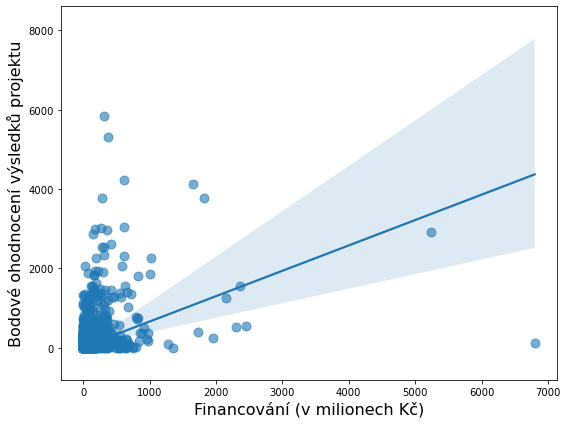

In [37]:
def add_margin(ax,x=0.05,y=0.05):
    # This will, by default, add 5% to the x and y margins. You 
    # can customise this using the x and y arguments when you call it.

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xmargin = (xlim[1]-xlim[0])*x
    ymargin = (ylim[1]-ylim[0])*y

    ax.set_xlim(xlim[0]-xmargin,xlim[1]+xmargin)
    ax.set_ylim(ylim[0]-ymargin,ylim[1]+ymargin)

plt.figure(figsize=(8, 6))
results['Financovani'] = results['Podpora ze SR'] + results['Ostatní veřejné zdroje fin.'] + results['Neveřejné zdroje fin.']
results['Financovani'] /= 1000
ax = sns.regplot(y='VahaEx', x='Financovani', data=results, scatter_kws={"s": 80, 'alpha': 0.6})
add_margin(ax)
plt.ylabel('Bodové ohodnocení výsledků projektu', fontsize=16)
plt.xlabel('Financování (v milionech Kč)', fontsize=16)
plt.tight_layout()

plt.savefig('vysledky_financovani.png')

In [37]:
results

Unnamed: 0 Kód projektu  \
0               0       1A8235   
1               1       1A8236   
2               2       1A8237   
3               3       1A8238   
4               4       1A8239   
...           ...          ...   
40624       40624  ZZ/610/2/97   
40625       40625  ZZ/610/3/97   
40626       40626  ZZ/620/2/97   
40627       40627  ZZ/620/4/97   
40628       40628  ZZ/620/6/97   

                                             Název česky  \
0      Účast neuroaktivních steroidů na mužské reprod...   
1      Zkvalitnění péče o pacienty s cystickou fibróz...   
2      Molekulárně cytogenetická analýza buněk mozkov...   
3      Modelování potenciálně antimykobakteriálně akt...   
4      Rozvoj aplikací DNA čipů pro potřeby diagnosti...   
...                                                  ...   
40624  Využití DNA polymorfismu pro identifikaci jedn...   
40625  Multielementární analýza mechu a humusu jako u...   
40626  Obnova a rekonstrukce lesních ekosystémů ve ve...   
40627  Ovlivnění tundrových geobiocenóz Krkonoš vysok...   
40628  Obnova biodiverzity a stability lesních ekosys...   

                                          Název anglicky  \
0              Neuroactive steroids in male reproduction   
1      Improvement of care for patients with cystic f...   
2      MOLECULAR CYTOGENETIC ANALYSIS OF BRAIN TUMOUR...   
3      Modelling of potentially antimycobacterial act...   
4      Applications of DNA microarrays in molecular d...   
...                                                  ...   
40624  Application of DNA polymorphism to individual ...   
40625  Multielement analyses of moss and humus as an ...   
40626  Regeneration and reconstruction of forest ecos...   
40627  Influence of hight-mountain aforrestation on t...   
40628  Restoration of biodiverzity and stability of f...   

                                           Anotace česky  \
0      Předmětem projektu je studium účasti neuroakti...   
1      Cílem je ověření efektivity (proveditelnosti a...   
2      Molekulárně cytogenetická studie signifikantní...   
3      Syntéza nových potenciálně antimykobakteriálně...   
4      Aplikace DNA čipů by měly významným způsobem p...   
...                                                  ...   
40624  Vypracování a optimalizace automatizovaných me...   
40625  V rámci mezinárodního monitorovacího programu ...   
40626  Velkoplošná chráněná území, Beskydy, Jizerské ...   
40627  Sledování vlivu vysokohorského zalesňování kos...   
40628  Projekt je zaměřen na získání údajů k podchyce...   

                                        Anotace anglicky  \
0      The aim of the project is the study of the par...   
1      The aim is to assess the efectivity of newborn...   
2      Molecular cytogenetic study of large cohort of...   
3      Tuberculosis is the leading cause of death in ...   
4      Applications of DNA microarrays might signific...   
...                                                  ...   
40624                                                NaN   
40625                                                NaN   
40626                                                NaN   
40627                                                NaN   
40628                                                NaN   

                                         Hlavní CEP obor  \
0      FB - Endokrinologie, diabetologie, metabolismu...   
1      FB - Endokrinologie, diabetologie, metabolismu...   
2                   EB - Genetika a molekulární biologie   
3                  FR - Farmakologie a lékárnická chemie   
4                   EB - Genetika a molekulární biologie   
...                                                  ...   
40624               EB - Genetika a molekulární biologie   
40625                 DI - Znečištění a kontrola vzduchu   
40626                                     GK - Lesnictví   
40627                       EH - Ekologie – společenstva   
40628                                     GK - Lesnict

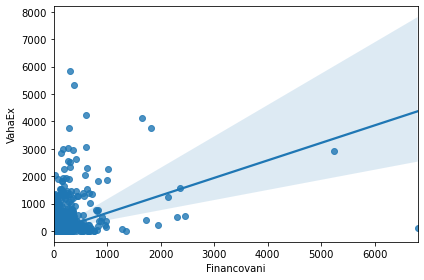

In [225]:
sns.regplot(x="Financovani", y="VahaEx", data=results)
plt.tight_layout()

In [50]:
results['Financovani'] = results['Podpora ze SR'] + results['Ostatní veřejné zdroje fin.'] + results['Neveřejné zdroje fin.']
results['Financovani'] /= 1000

In [51]:
len(results)

40629

In [52]:
results['Vaha'].sum()

1154007

In [53]:
for k, v in weights.items():
    print(f'{k}:{v}')

Jx:2
Jimp:9
Jost:7
JSC:7
D:4
C:3
O:1
X:1
B:6
Vsouhrn:2
Vx:2
Vutaj:2
Gfunk:3
Gprot:3
A:4
Nmap:4
NmetC:2
NmetS:2
NmetA:2
Npam:2
Nlec:2
W:2
M:2
R:4
Fuzit:3
Fprum:3
Ztech:4
Zpolop:4
Zodru:4
Zx:1
Zplem:2
P:8
Enekrit:2
Ekrit:3
Hleg:2
Hneleg:2
Hkonc:2
Sdb:4


In [60]:
results

Unnamed: 0 Kód projektu  \
0               0       1A8235   
1               1       1A8236   
2               2       1A8237   
3               3       1A8238   
4               4       1A8239   
...           ...          ...   
40624       40624  ZZ/610/2/97   
40625       40625  ZZ/610/3/97   
40626       40626  ZZ/620/2/97   
40627       40627  ZZ/620/4/97   
40628       40628  ZZ/620/6/97   

                                                                                                                               Název česky  \
0                                                                                       Účast neuroaktivních steroidů na mužské reprodukci   
1      Zkvalitnění péče o pacienty s cystickou fibrózou včasnou a efektivní diagnostikou pomocí dvoustupňového novorozeneckého screeningu.   
2                                           Molekulárně cytogenetická analýza buněk mozkových tumorů a její přínos pro diagnostiku a léčbu   
3                                                                               Modelování potenciálně antimykobakteriálně aktivních látek   
4                         Rozvoj aplikací DNA čipů pro potřeby diagnostiky a studium patogenese a léčby dědičných metabolických onemocnění   
...                                                                                                                                    ...   
40624                                                Využití DNA polymorfismu pro identifikaci jednotlivých živočichů chráněných dle CITES   
40625   Multielementární analýza mechu a humusu jako ukazatel zátěže území ČR depozicemi kovů a podklad pro evropský monitorovací program.   
40626                                                        Obnova a rekonstrukce lesních ekosystémů ve velkoplošných chráněných územích.   
40627                                                                  Ovlivnění tundrových geobiocenóz Krkonoš vysokohorským zalesňováním   
40628                              Obnova biodiverzity a stability lesních ekosystémů v pásmu přirozeného výskytu smrku na území NP Šumava   

                                                                                                                                                   Název anglicky  \
0                                                                                                                       Neuroactive steroids in male reproduction   
1                                Improvement of care for patients with cystic fibrosis by early and efficient diagnosis via two-tier neonatal screening programme   
2                                                           MOLECULAR CYTOGENETIC ANALYSIS OF BRAIN TUMOUR CELLS AND ITS CONTRIBUTION TO DIAGNOSIS AND TREATMENT.   
3                                                                                                     Modelling of potentially antimycobacterial active compounds   
4                                                Applications of DNA microarrays in molecular diagnostics, research and treatment of inherited metabolic disoders   
...                                                                                                                                                           ...   
40624                                                                  Application of DNA polymorphism to individual identification of animals protected by CITES   
40625  Multielement analyses of moss and humus as an indikator of metal deposition loads of the CZ territory and tha datum for the European monitoring programme.   
40626                                                                              Regeneration and reconstruction of forest ecosystems in large protected areas.   
40627                                                                            Influence of hight-mountain aforrestation on the Krkonoše Mts. tundra biocenoses   
40628     Restoration of biodiverzity and stability of forest ecosystems in th

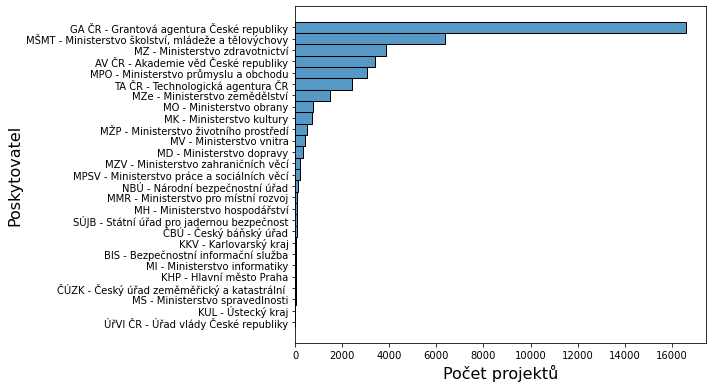

In [42]:
plt.figure(figsize=(10, 5.5))
sorted_domains = sort_by_group_counts(results, 'Poskytovatel')
sns.histplot(sorted_domains, y='Poskytovatel')
plt.ylabel('Poskytovatel', fontsize=16)
plt.xlabel('Počet projektů', fontsize=16)
plt.tight_layout()
plt.savefig('poskytovatele_cz.pdf')

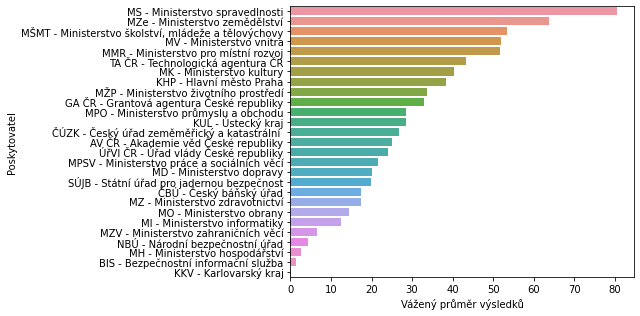

In [313]:
plt.figure(figsize=(9, 4.5))
grouped_res = results.groupby('Poskytovatel').agg({'Vaha': lambda x: (x.sum() + 1) / len(x)}).reset_index()
grouped_res = grouped_res.sort_values(by='Vaha', ascending=False)
sns.barplot(x='Vaha', y='Poskytovatel', data=grouped_res)
plt.xlabel('Vážený průměr výsledků')
plt.tight_layout()

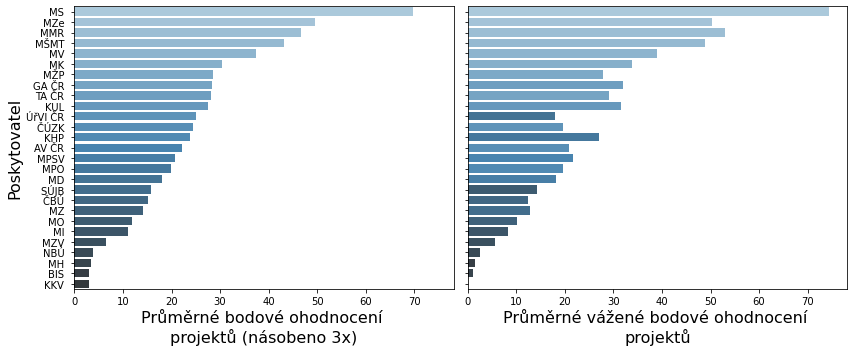

In [52]:
grouped_res = results.groupby('Poskytovatel').agg({'VahaEx': lambda x: (x.sum() + 1) / len(x),
                                                   'Vaha': lambda x: (x.sum() + 1) / len(x)}).reset_index()
grouped_res = grouped_res.sort_values(by='Vaha', ascending=False)
grouped_res['Poskytovatel'] = grouped_res['Poskytovatel'].apply(lambda x: x.split('-')[0])
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12, 5))
pal = sns.color_palette("Blues_d", len(grouped_res))
rank = grouped_res['Vaha'].argsort()
sns.barplot(x='Vaha', y='Poskytovatel', palette=np.array(pal[::-1])[rank], data=grouped_res, ax=ax1)
ax1.set_xlabel('Průměrné bodové ohodnocení \nprojektů (násobeno 3x)', fontsize=16)
ax1.set_ylabel('Poskytovatel', fontsize=16)
rank = grouped_res['VahaEx'].argsort()
sns.barplot(x='VahaEx', y='Poskytovatel', palette=np.array(pal[::-1])[rank], data=grouped_res, ax=ax2)
ax2.set_ylabel('')
ax2.set_xlabel('Průměrné vážené bodové ohodnocení \nprojektů', fontsize=16)
plt.tight_layout()
plt.savefig('vysledky_poskytovatele.pdf')

In [306]:
results.groupby('Poskytovatel').agg({'VahaEx': lambda x: (x.sum() + 1) / len(x)})

VahaEx
Poskytovatel                                                 
AV ČR - Akademie věd České republiky                20.749703
BIS - Bezpečnostní informační služba                 1.142857
GA ČR - Grantová agentura České republiky           31.960946
KHP - Hlavní město Praha                            27.105263
KKV - Karlovarský kraj                               0.031250
KUL - Ústecký kraj                                  31.500000
MD - Ministerstvo dopravy                           18.057878
MH - Ministerstvo hospodářství                       1.506849
MI - Ministerstvo informatiky                        8.363636
MK - Ministerstvo kultury                           33.773585
MMR - Ministerstvo pro místní rozvoj                52.953488
MO - Ministerstvo obrany                            10.108844
MPO - Ministerstvo průmyslu a obchodu               19.634691
MPSV - Ministerstvo práce a sociálních věcí         21.678756
MS - Ministerstvo spravedlnosti                     74.400000
MV - Ministerstvo vnitra                            38.872289
MZ - Ministerstvo zdravotnictví                     12.860622
MZV - Ministerstvo zahraničních věcí                 5.595000
MZe - Ministerstvo zemědělství                      50.215686
MŠMT - Ministerstvo školství, mládeže a tělovýc...  48.921260
MŽP - Ministerstvo životního prostředí              27.894515
NBÚ - Národní bezpečnostní úřad                      2.575758
SÚJB - Státní úřad pro jadernou bezpečnost          14.208333
TA ČR - Technologická agentura ČR                   29.103636
ÚřVl ČR - Úřad vlády České republiky                18.000000
ČBÚ - Český báňský úřad                             12.313725
ČÚZK - Český úřad zeměměřický a katastrální         19.500000

3.210526315789474

In [473]:
results.groupby('Poskytovatel').agg({'VahaEx': lambda x: list(x)}) 

VahaEx
Poskytovatel                                                                                         
AV ČR - Akademie věd České republiky                [346, 704, 541, 9, 4, 8, 22, 79, 61, 143, 99, ...
BIS - Bezpečnostní informační služba                [1, 1, 1, 6, 1, 3, 1, 4, 1, 3, 3, 1, 1, 0, 0, ...
GA ČR - Grantová agentura České republiky           [91, 82, 22, 12, 68, 10, 14, 38, 108, 10, 44, ...
KHP - Hlavní město Praha                            [109, 3, 27, 78, 55, 22, 29, 3, 9, 12, 4, 56, ...
KKV - Karlovarský kraj                              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
KUL - Ústecký kraj                                                                           [18, 44]
MD - Ministerstvo dopravy                           [21, 15, 16, 16, 51, 6, 21, 26, 14, 6, 5, 171,...
MH - Ministerstvo hospodářství                      [0, 6, 2, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, ...
MI - Ministerstvo informatiky                       [2, 2, 2, 18, 18, 6, 8, 8, 16, 24, 8, 6, 4, 13...
MK - Ministerstvo kultury                           [10, 30, 4, 4, 6, 6, 4, 4, 25, 2, 16, 46, 12, ...
MMR - Ministerstvo pro místní rozvoj                [118, 20, 20, 40, 19, 3, 19, 13, 16, 3, 4, 12,...
MO - Ministerstvo obrany                            [2, 2, 6, 2, 2, 4, 2, 2, 2, 2, 2, 34, 2, 2, 2,...
MPO - Ministerstvo průmyslu a obchodu               [61, 5, 9, 6, 1, 21, 94, 36, 20, 16, 184, 26, ...
MPSV - Ministerstvo práce a sociálních věcí         [67, 87, 66, 426, 24, 117, 134, 40, 76, 63, 66...
MS - Ministerstvo spravedlnosti                                                 [144, 58, 29, 6, 134]
MV - Ministerstvo vnitra                            [10, 2, 2, 2, 25, 2, 2, 2, 2, 2, 2, 3, 14, 2, ...
MZ - Ministerstvo zdravotnictví                     [15, 18, 6, 56, 2, 8, 18, 2, 11, 2, 14, 6, 4, ...
MZV - Ministerstvo zahraničních věcí                [2, 2, 2, 2, 2, 2, 16, 2, 6, 8, 0, 7, 2, 2, 28...
MZe - Ministerstvo zemědělství                      [32, 66, 106, 20, 18, 26, 16, 14, 6, 66, 46, 1...
MŠMT - Ministerstvo školství, mládeže a tělovýc...  [3, 0, 10, 11, 8, 2, 4, 0, 0, 16, 4, 0, 20, 8,...
MŽP - Ministerstvo životního prostředí              [0, 2, 1, 2, 24, 43, 12, 12, 4, 2, 6, 0, 32, 2...
NBÚ - Národní bezpečnostní úřad                     [2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, ...
SÚJB - Státní úřad pro jadernou bezpečnost          [30, 2, 2, 6, 2, 2, 2, 33, 4, 2, 4, 6, 3, 1, 3...
TA ČR - Technologická agentura ČR                   [63, 37, 30, 42, 48, 73, 93, 50, 41, 115, 230,...
ÚřVl ČR - Úřad vlády České republiky                                                             [17]
ČBÚ - Český báňský úřad                             [11, 4, 6, 15, 1, 3, 13, 9, 9, 9, 24, 15, 10, ...
ČÚZK - Český úřad zeměměřický a katastrální                       [14, 4, 1, 2, 4, 13, 3, 44, 104, 5]

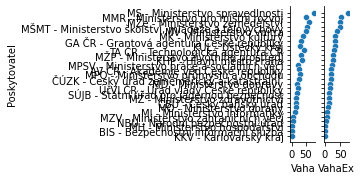

In [320]:
sns.pairplot(grouped_res, x_vars=['Vaha', 'VahaEx'], y_vars=['Poskytovatel'])

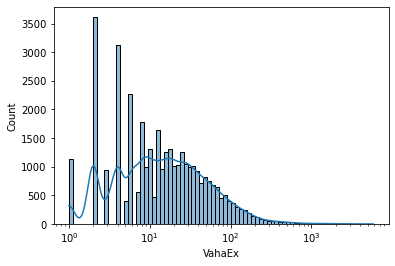

In [387]:
sns.histplot(results[results['VahaEx'] > 0]['VahaEx'], log_scale=True, kde=True)

In [386]:
results['VahaEx'].mean()

30.61561938516823

AttributeError: 'Series' object has no attribute 'unqiue'